### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [3]:
gap = px.data.gapminder()
bd = gap[gap["country"] == "Bangladesh"]
bd.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
96,Bangladesh,Asia,1952,37.484,46886859,684.244172,BGD,50
97,Bangladesh,Asia,1957,39.348,51365468,661.637458,BGD,50
98,Bangladesh,Asia,1962,41.216,56839289,686.341554,BGD,50
99,Bangladesh,Asia,1967,43.453,62821884,721.186086,BGD,50
100,Bangladesh,Asia,1972,45.252,70759295,630.233627,BGD,50


<Axes: xlabel='year', ylabel='lifeExp'>

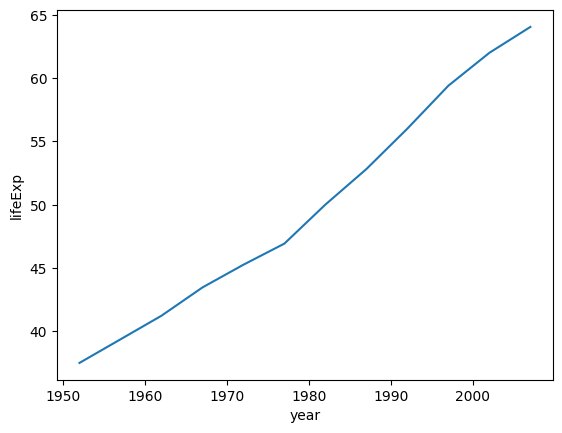

In [4]:
# axes level function
sns.lineplot(data=bd, x="year", y="lifeExp")

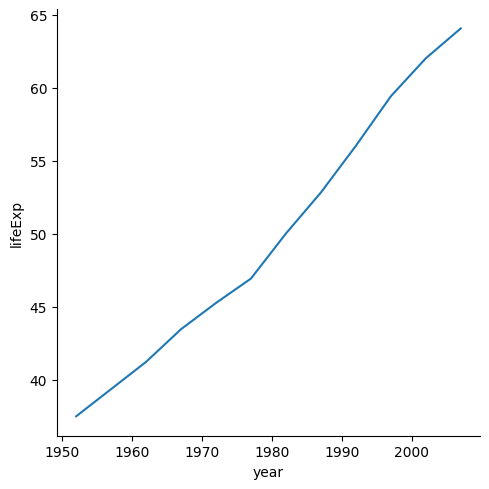

In [5]:
# using relplot
sns.relplot(data=bd, x="year", y="lifeExp", kind="line")

In [6]:
# hue -> style

temp_df = gap[gap["country"].isin(["Bangladesh", "Brazil", "Germany"])]

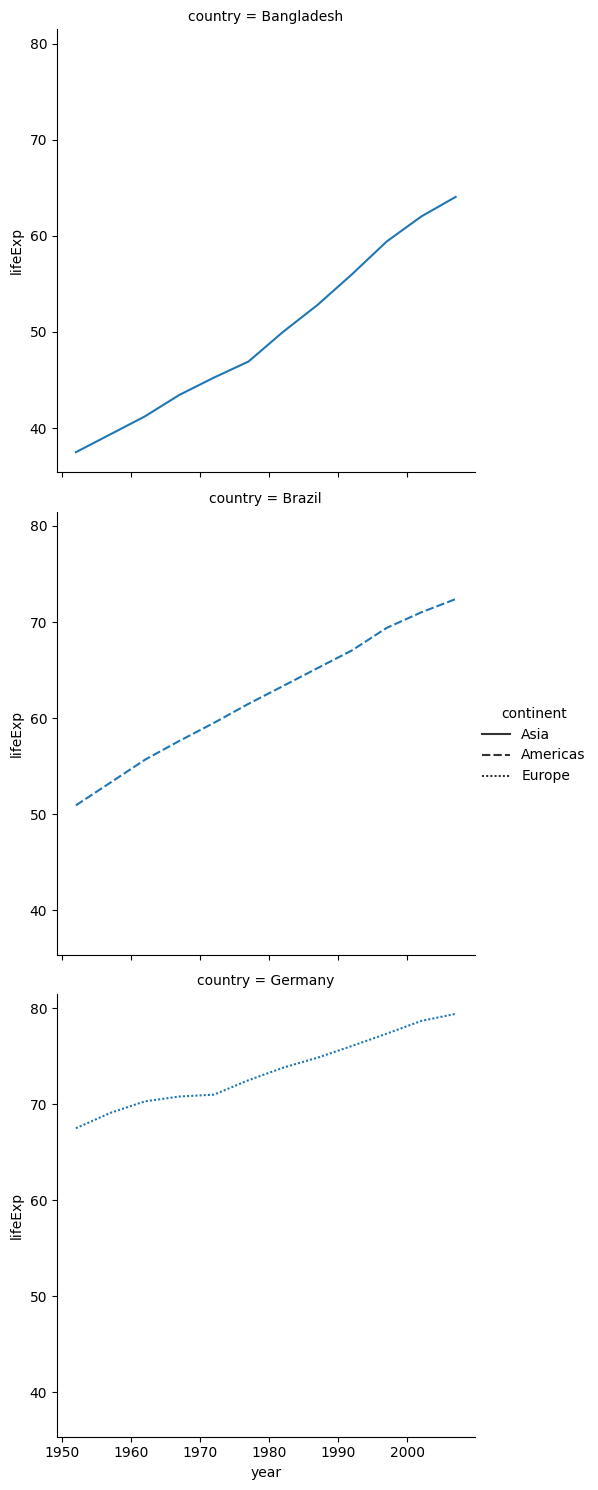

In [10]:
sns.relplot(
    kind="line", data=temp_df, x="year", y="lifeExp", row="country", style="continent"
)

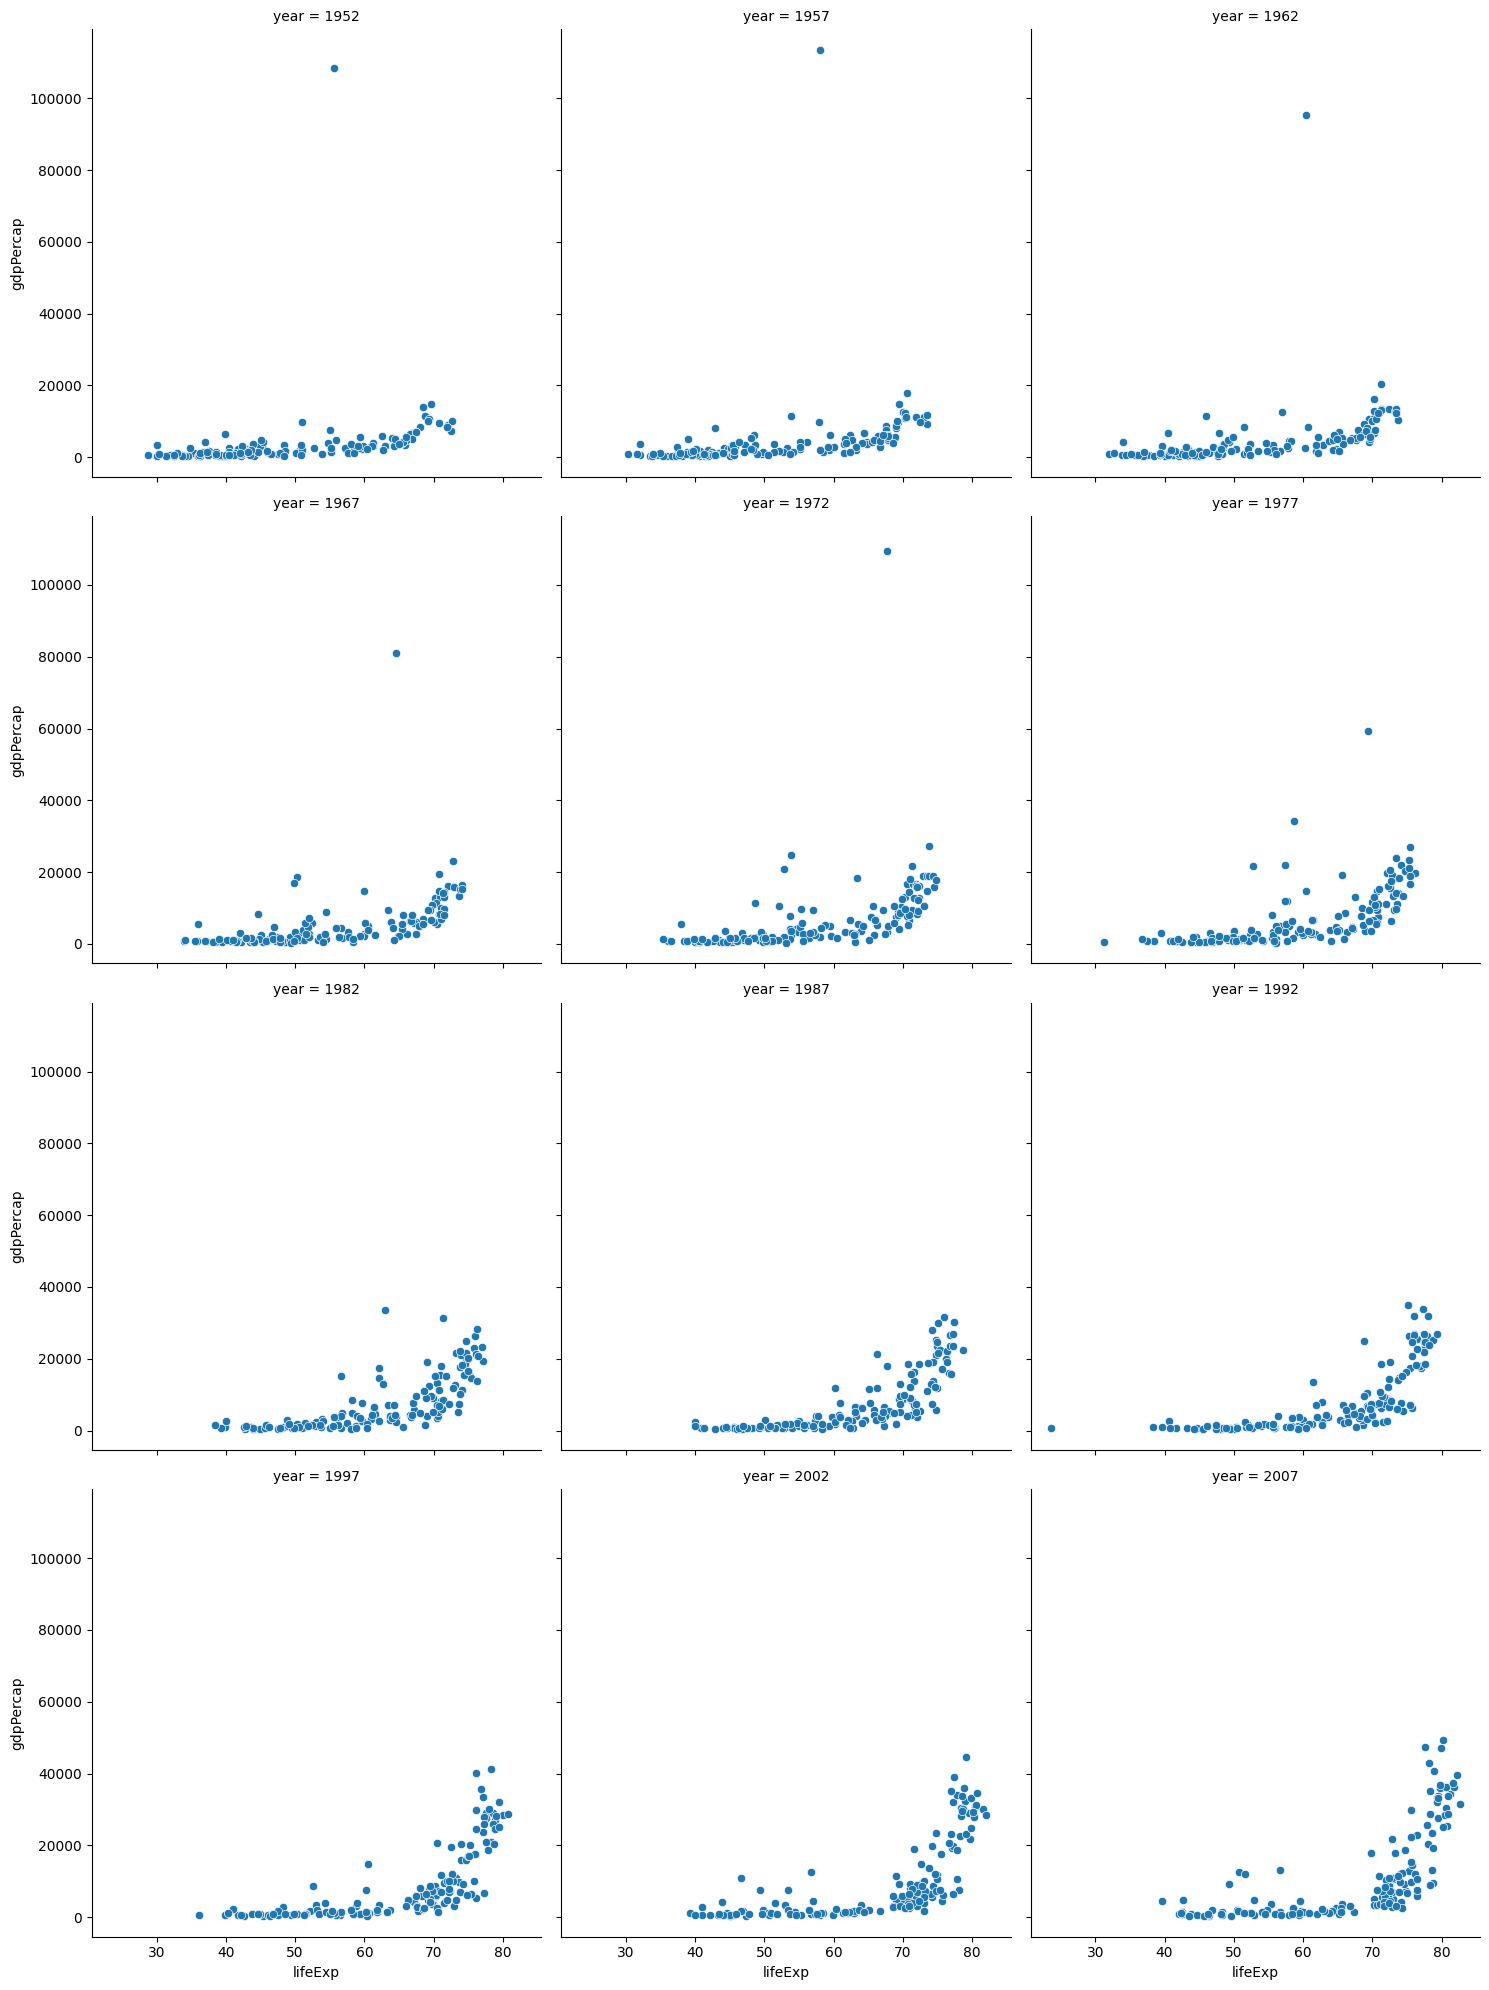

In [8]:
# col wrap

sns.relplot(
    data=gap, x="lifeExp", y="gdpPercap", kind="scatter", col="year", col_wrap=3
)

### Distribution plots

- Histplot
- Kdeplot
- Rugplot

In [ ]:
# figure level => distplot
# axes level => histplot => kdeplot => rugplot

<Axes: xlabel='lifeExp', ylabel='Count'>

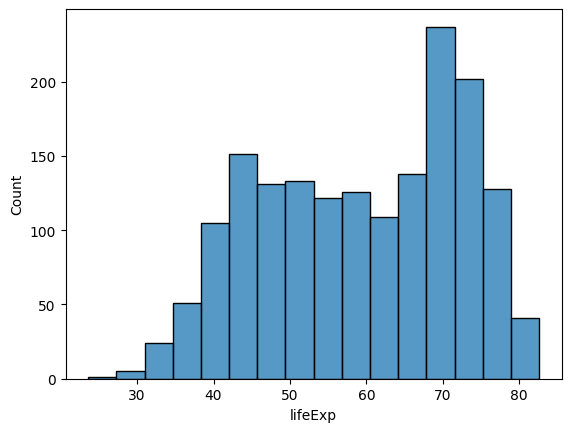

In [11]:
# plotting univariate plot

sns.histplot(data=gap, x="lifeExp")

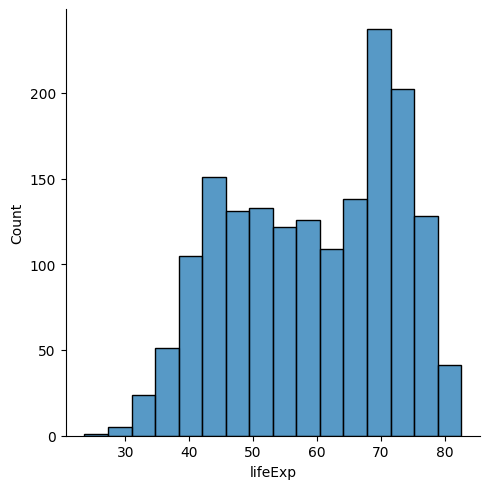

In [13]:
sns.displot(data=gap, x="lifeExp", kind="hist")

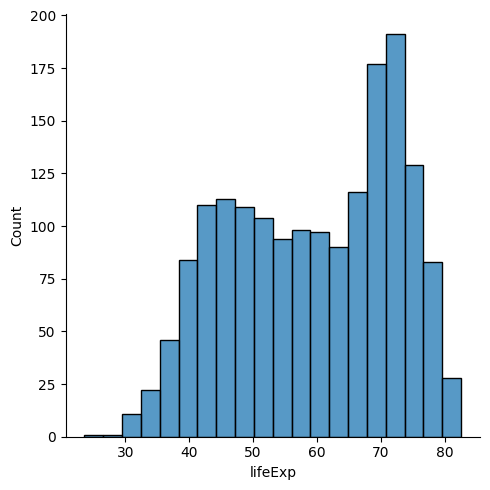

In [15]:
# bins parameter
sns.displot(data=gap, x="lifeExp", kind="hist", bins=20)

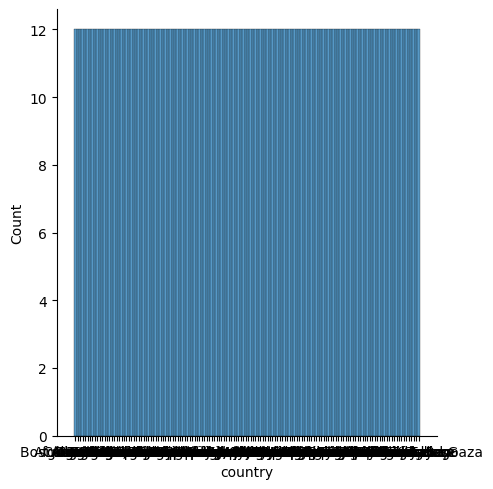

In [ ]:
# it is also possible to visualize the distribution of a categorical variable using the logic of a histogram .
# Discrete bins are automatically set for categorical variables


# countplot
sns.displot(data=gap, x="country", kind="hist")

In [19]:
# hue parameter
tips = pd.read_csv("./data/tips.csv")
tips.head()

,index,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


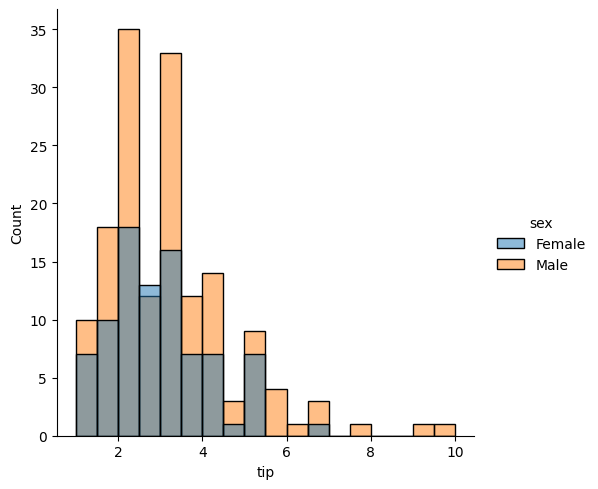

In [21]:
sns.displot(data=tips, x="tip", kind="hist", hue="sex")

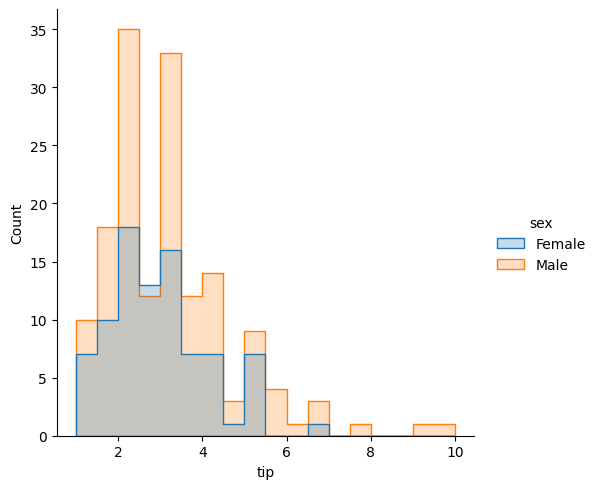

In [22]:
# element -> step

sns.displot(data=tips, x="tip", kind="hist", hue="sex", element="step")

In [24]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


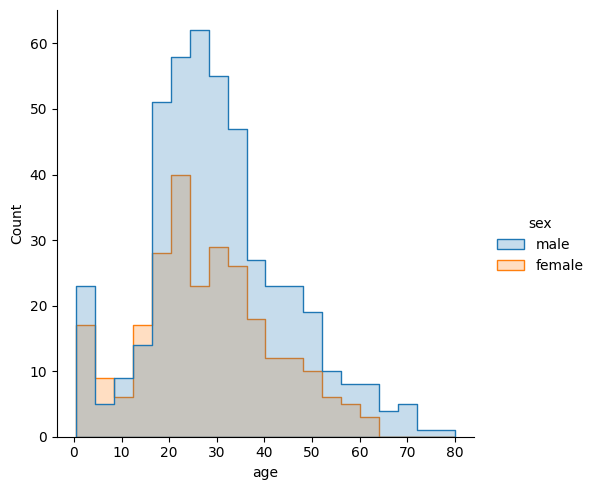

In [25]:
sns.displot(data=titanic, x="age", kind="hist", element="step", hue="sex")

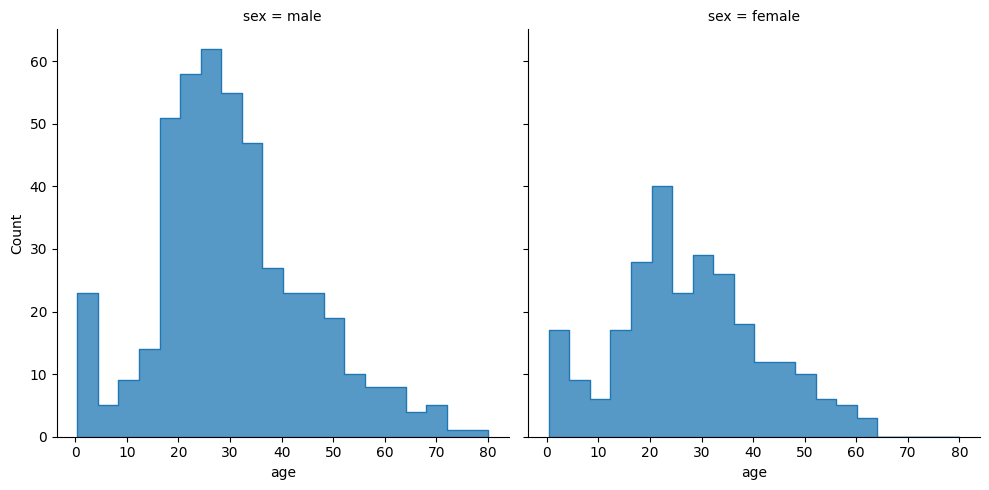

In [26]:
sns.displot(data=titanic, x="age", kind="hist", element="step", col="sex")

<Axes: xlabel='total_bill', ylabel='Density'>

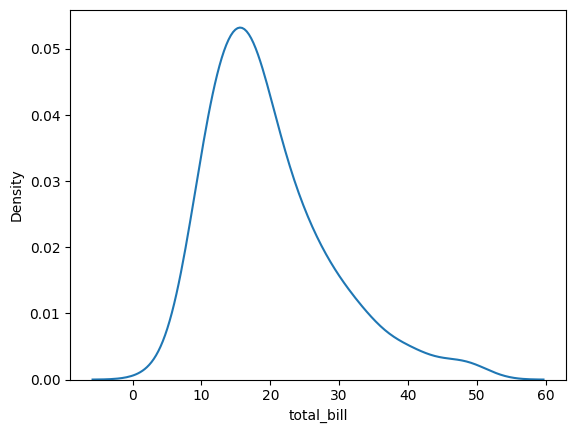

In [28]:
# kdeplot
# Rather than using discrete bins , a KDE plot smooths the observations with Gaussian karnel , producting a continuous density

sns.kdeplot(data=tips, x="total_bill")

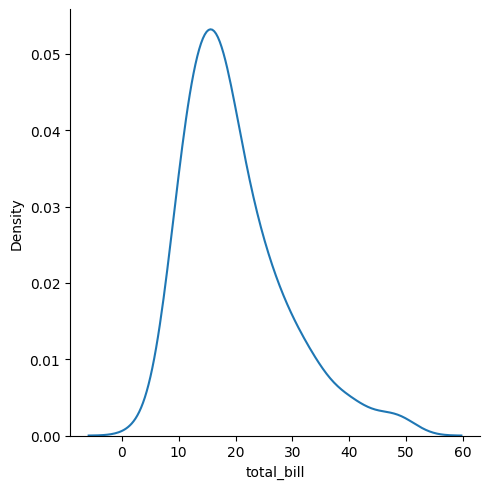

In [ ]:

sns.displot(data=tips, x="total_bill", kind="kde")

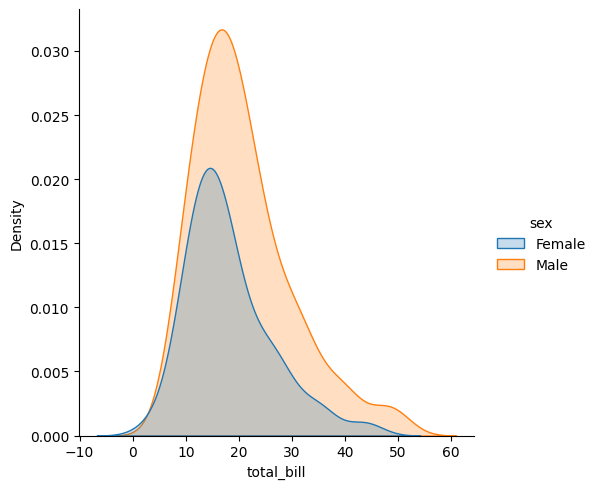

In [31]:
# hue-> fill

sns.displot(data=tips, x="total_bill", kind="kde", hue="sex", fill=True)

<Axes: xlabel='total_bill', ylabel='Density'>

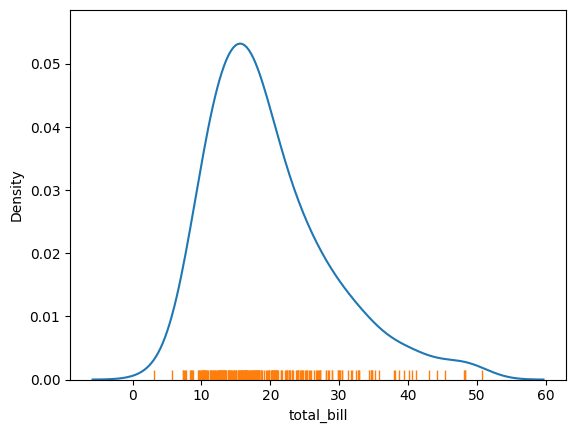

In [32]:
# rugplot

# plot marginal distributions by drowning ticrs along the x and y axis

# this function is intend to complete other plots by showing the location of individual observations

sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill', ylabel='tip'>

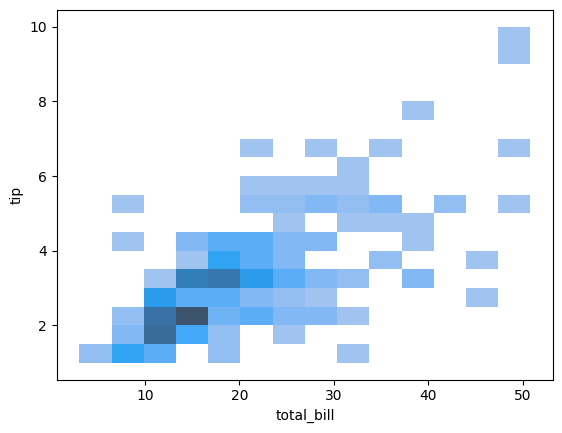

In [33]:
# bivariate histogram

sns.histplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

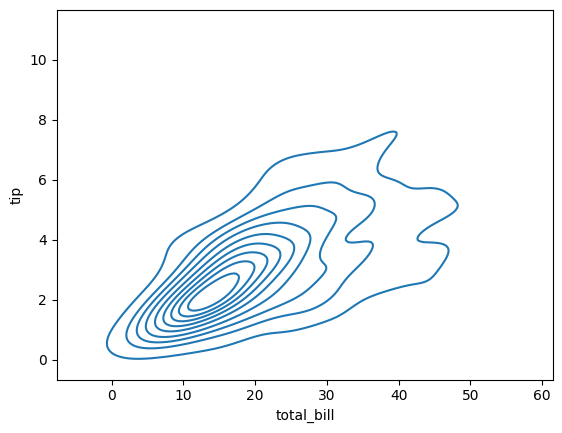

In [34]:
# Bivariate kdeplot
sns.kdeplot(data=tips, x="total_bill", y="tip")

### Matrix plot
- Heatmap
- Clustermap

In [50]:
# heatmap
# plot rectangular
temp_df = gap.pivot(index="country", columns="year", values="lifeExp")
temp_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


<Axes: xlabel='year', ylabel='country'>

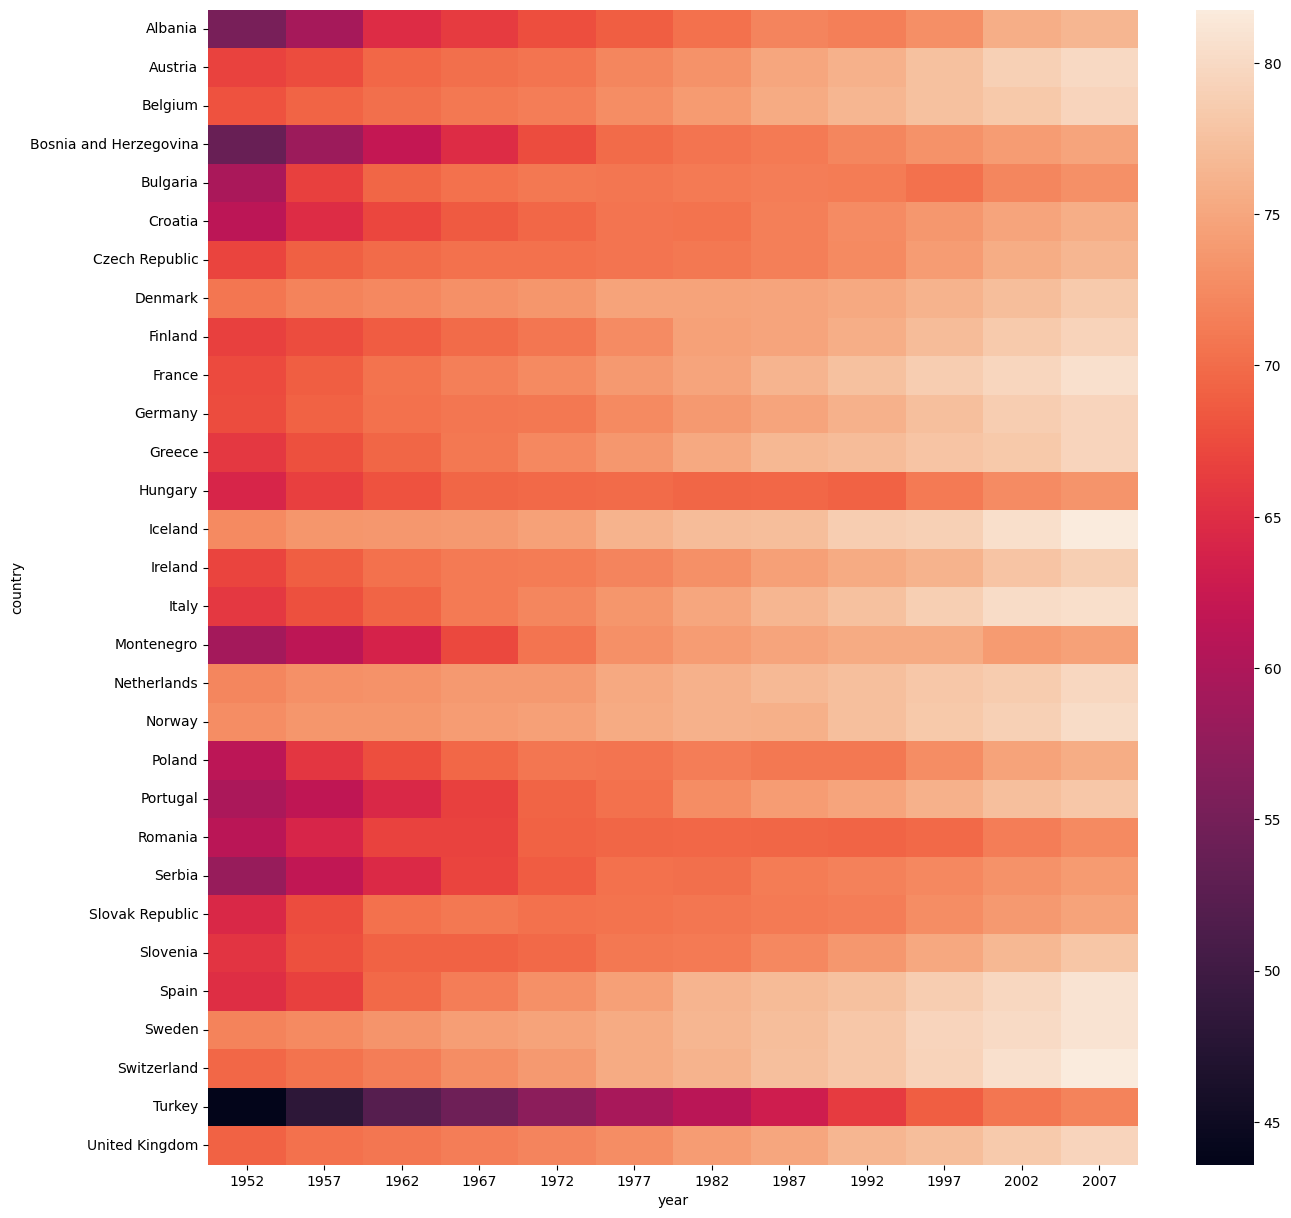

In [54]:
# a axes level function
plt.figure(figsize=(15, 15))
sns.heatmap(temp_df)

In [56]:
# annot
temp_df = gap[gap["continent"] == "Europe"].pivot(
    index="country", columns="year", values="lifeExp"
)

<Axes: xlabel='year', ylabel='country'>

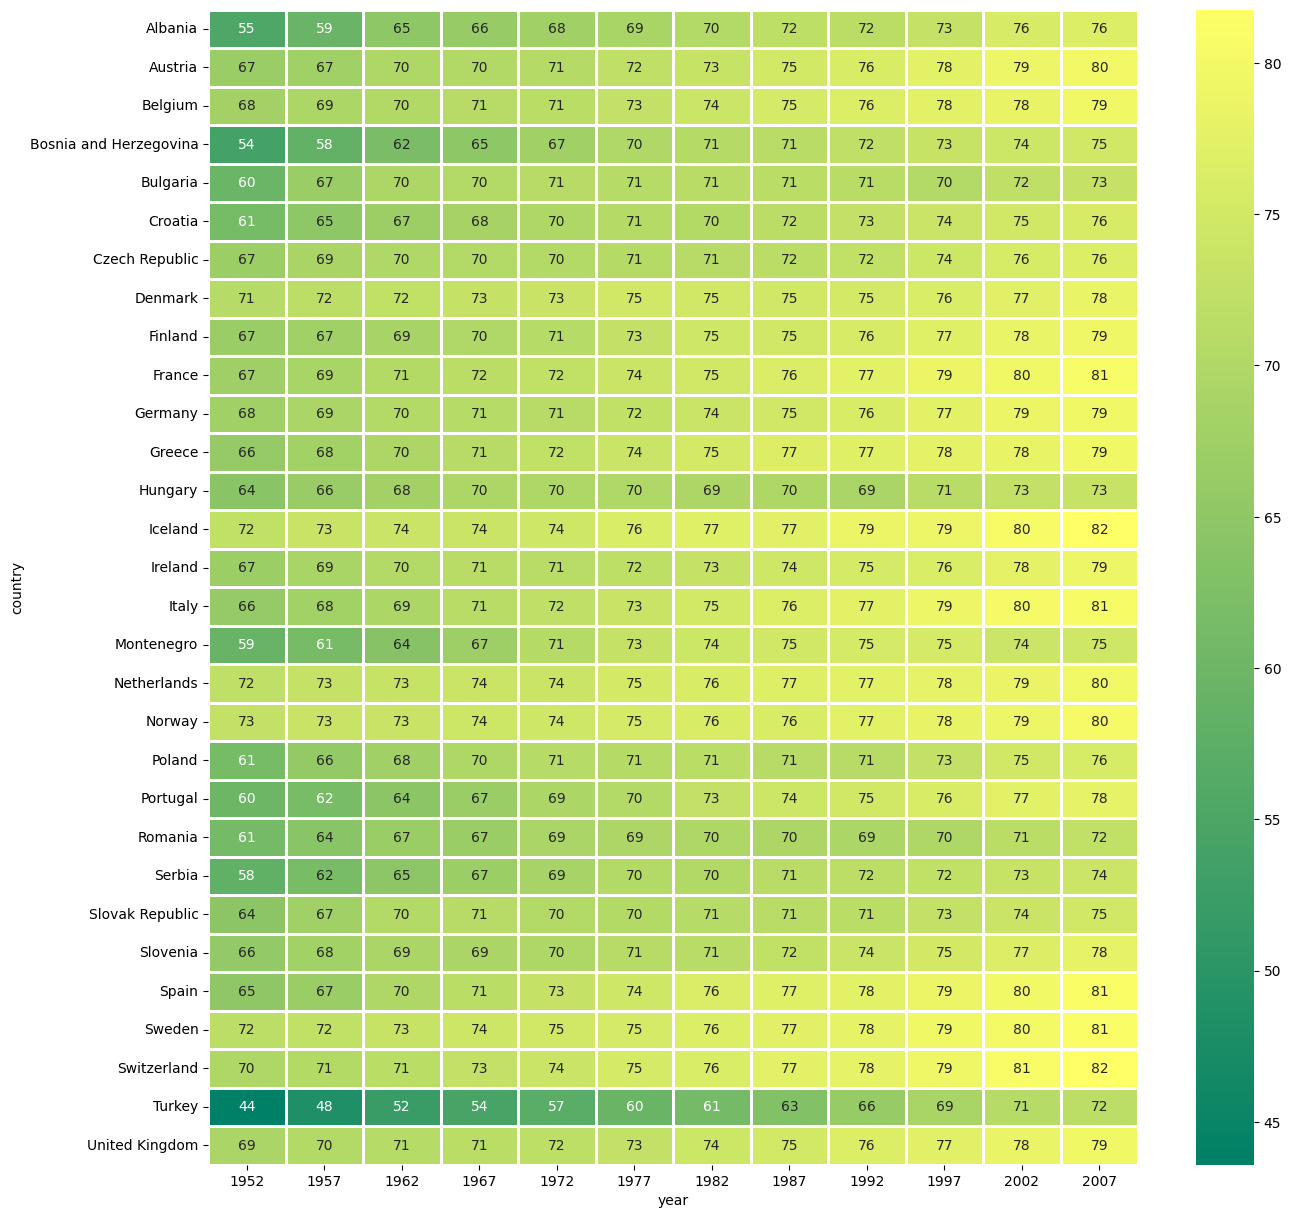

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(temp_df, annot=True, linewidths=1, cmap="summer")

In [63]:
# cluster map

iris = px.data.iris()

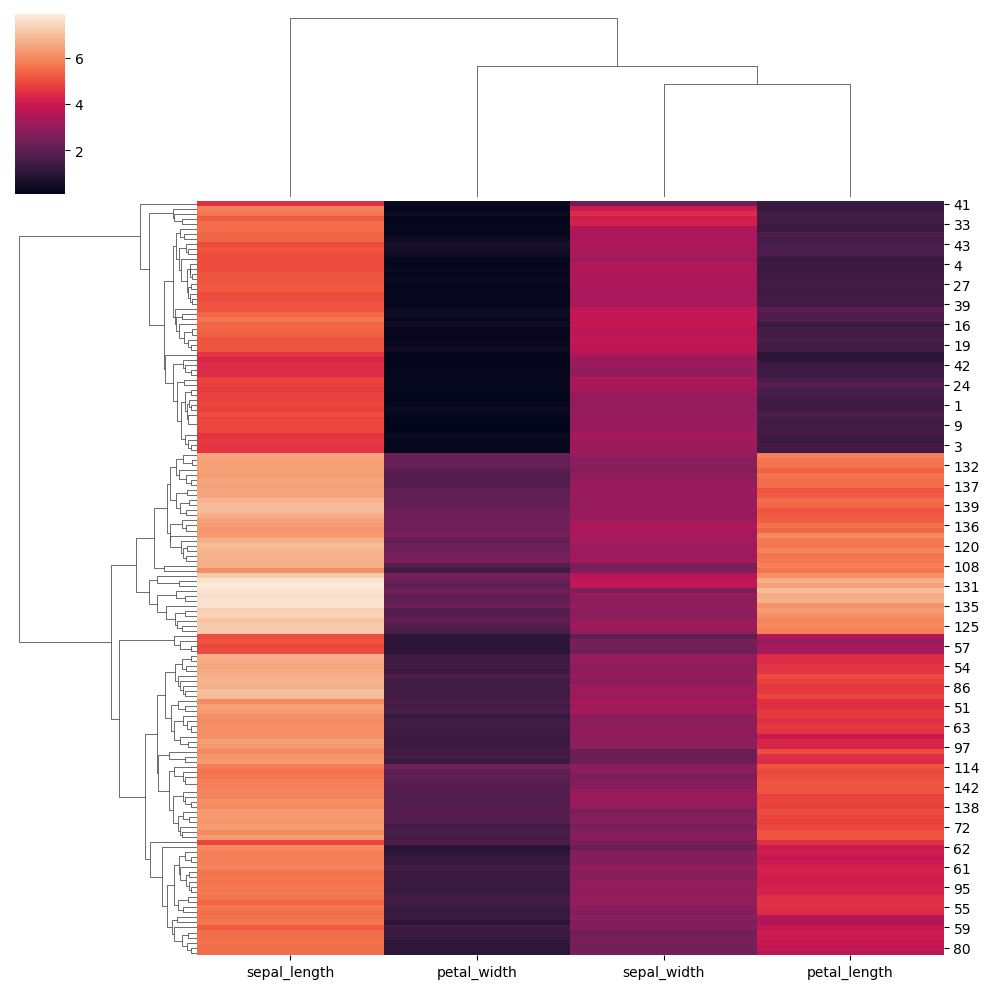

In [64]:
sns.clustermap(iris.iloc[:, [0, 1, 2, 3]])